In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
## defining constants
PATH_STATION_HOUR = "dataset/station_hour.csv"
PATH_STATION_DAY = "dataset/station_day.csv"
PATH_CITY_HOUR = "dataset/city_hour.csv"
PATH_CITY_DAY = "dataset/city_day.csv"
PATH_STATIONS = "dataset/stations.csv"

STATIONS = ["KL007", "KL008"]

# Dataset India x dia 2015-2020

In [59]:
dataset = pd.read_csv(PATH_CITY_DAY)
df_city_day = dataset.copy()

In [60]:
df = df_city_day.loc[:, ~df_city_day.columns.isin(['Benzene','Toluene', 'Xylene'])]
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,54.0,Satisfactory


In [61]:
df.shape

(29531, 13)

In [62]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
AQI            4681
AQI_Bucket     4681
dtype: int64

In [63]:
df['AQI_Bucket'].value_counts(ascending= True)

Severe          1338
Good            1341
Very Poor       2337
Poor            2781
Satisfactory    8224
Moderate        8829
Name: AQI_Bucket, dtype: int64

In [64]:
df=df[~df.AQI_Bucket.isna()]

In [65]:
df.shape

(24850, 13)

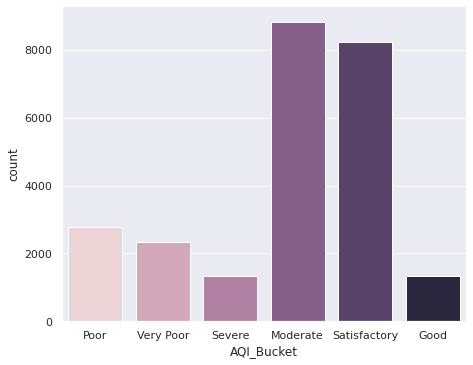

In [38]:
sns.catplot(x = "AQI_Bucket", kind= "count", palette = "ch: 2.87", height=5, aspect=1.3, data = df)

### Eliminando columnas con mayor numero de valores nulos

In [43]:
df.isnull().sum()

City             0
Date             0
PM2.5          500
PM10             0
NO             127
NO2            132
NOx           1027
NH3              0
CO             324
SO2            302
O3             356
AQI              0
AQI_Bucket       0
dtype: int64

In [40]:
#Eliminado filas de las columnas con mas N/A
df = df.dropna(axis = 0, subset = ['PM10'])
df = df.dropna(axis = 0, subset = ['NH3'])

In [42]:
df.shape

(15792, 13)

### Llenamos los valores con el promedio para no perder tanta información

In [44]:
df.isnull().sum()

City             0
Date             0
PM2.5          500
PM10             0
NO             127
NO2            132
NOx           1027
NH3              0
CO             324
SO2            302
O3             356
AQI              0
AQI_Bucket       0
dtype: int64

In [45]:
df=df.fillna(df.mean())

In [46]:
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
AQI           0
AQI_Bucket    0
dtype: int64

<AxesSubplot:xlabel='City'>

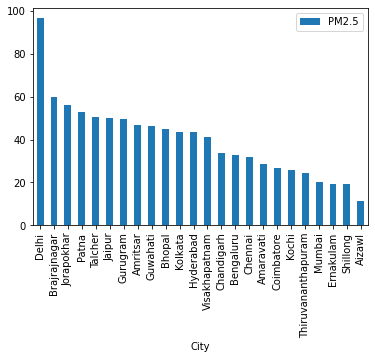

In [16]:
df[['PM2.5', 'City']].groupby(['City']).median().sort_values("PM2.5", ascending = False).plot.bar()

<AxesSubplot:xlabel='City'>

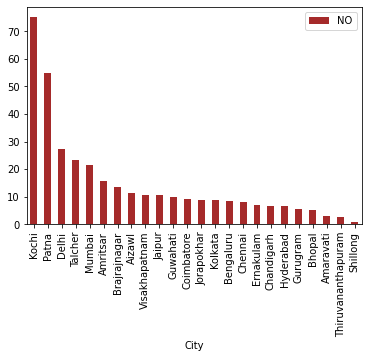

In [17]:
df[['NO', 'City']].groupby(['City']).median().sort_values("NO", ascending = False).plot.bar(color='brown')

<AxesSubplot:xlabel='City'>

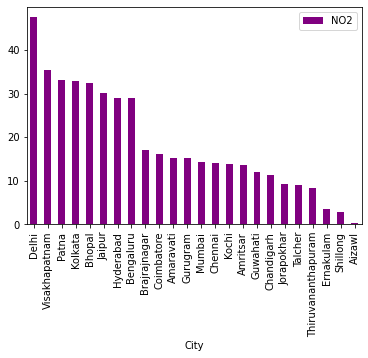

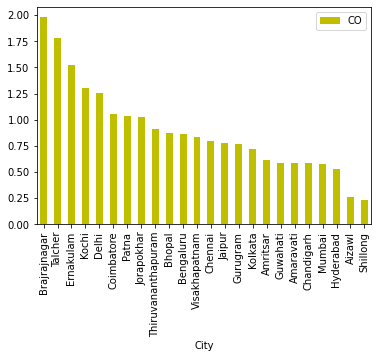

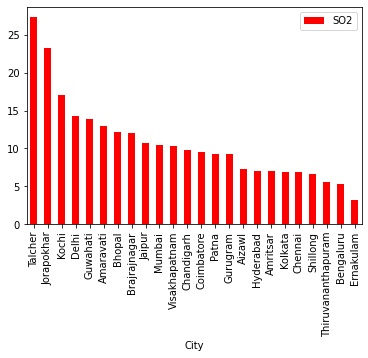

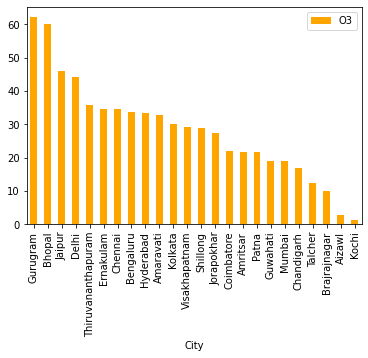

In [18]:
df[['NO2', 'City']].groupby(['City']).median().sort_values("NO2", ascending = False).plot.bar(color='purple')
df[['CO', 'City']].groupby(['City']).median().sort_values("CO", ascending = False).plot.bar(color='y')
df[['SO2', 'City']].groupby(['City']).median().sort_values("SO2", ascending = False).plot.bar(color='r')
df[['O3', 'City']].groupby(['City']).median().sort_values("O3", ascending = False).plot.bar(color='orange')

/home/efra/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


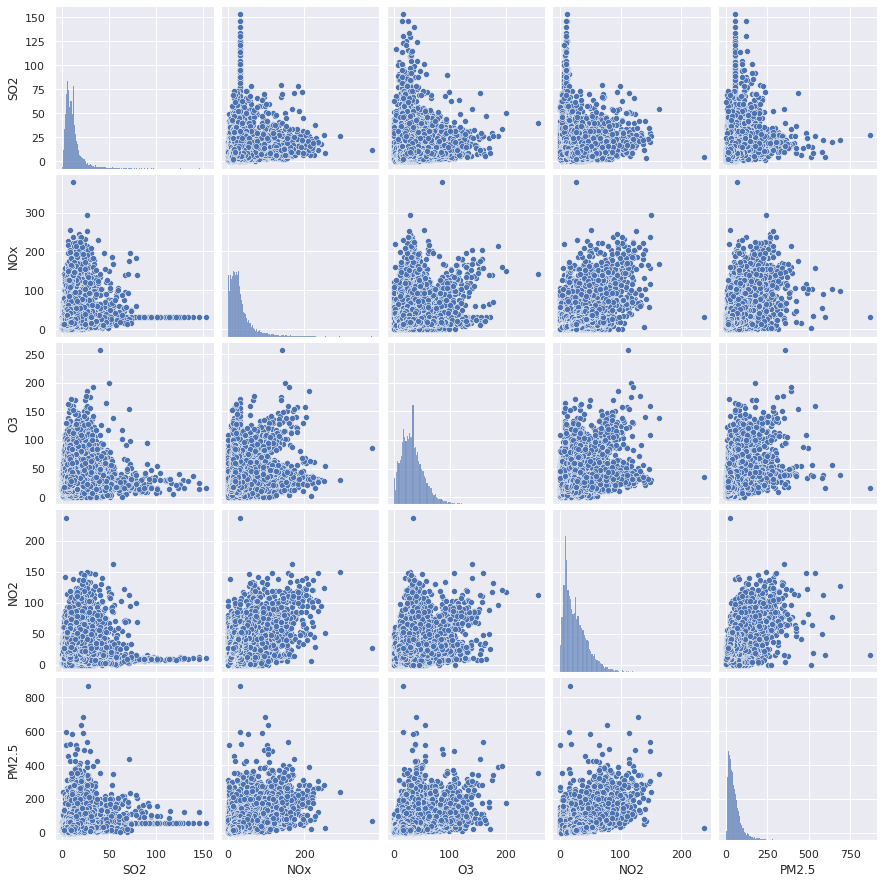

In [47]:
sns.set()
cols = ['SO2', 'NOx', 'O3', 'NO2', 'PM2.5']
sns.pairplot(df[cols], size = 2.5)
plt.show()

<AxesSubplot:>

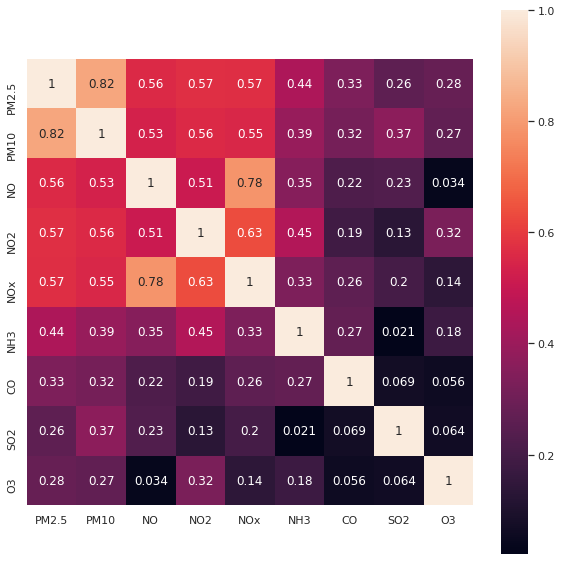

In [48]:
corrmat = df.corr()
heatmap_df= corrmat.drop(['AQI']).drop(['AQI'], axis=1)
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(heatmap_df, vmax = 1, square = True, annot = True)

# AQI valores- rangos
https://www.airnow.gov/aqi/aqi-basics/

In [50]:
df.shape

(15792, 13)

In [51]:
df['AQI_Bucket'] = df['AQI_Bucket'].map({'Good':'green',
                             'Satisfactory':'yellow',
                             'Moderate':'orange',
                            'Poor':'red',
                            'Very Poor':'purple',
                            'Severe':'maroon',
                             },
                             na_action=None)

In [52]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket
2010,Aizawl,2020-03-12,31.21,38.66,7.20,1.27,10.65,25.63,0.56,4.22,2.81,52.0,yellow
2011,Aizawl,2020-03-13,38.39,46.68,7.19,0.91,10.37,29.16,0.57,4.46,0.18,60.0,yellow
2012,Aizawl,2020-03-14,43.23,50.83,7.14,1.07,10.48,28.95,0.57,4.53,0.41,62.0,yellow
2013,Aizawl,2020-03-15,33.82,41.03,7.09,0.36,9.73,28.41,0.48,4.63,0.30,70.0,yellow
2014,Aizawl,2020-03-16,27.14,35.04,5.63,2.32,8.09,23.98,0.50,4.71,13.02,54.0,yellow


In [53]:
df['AQI_range'] = df['AQI_Bucket'].map({'green':0,
                             'yellow':1,
                             'orange':2,
                            'red':3,
                            'purple':4,
                            'maroon':5,
                             },
                             na_action=None)

In [55]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,AQI_range
2010,Aizawl,2020-03-12,31.21,38.66,7.20,1.27,10.65,25.63,0.56,4.22,2.81,52.0,yellow,1
2011,Aizawl,2020-03-13,38.39,46.68,7.19,0.91,10.37,29.16,0.57,4.46,0.18,60.0,yellow,1
2012,Aizawl,2020-03-14,43.23,50.83,7.14,1.07,10.48,28.95,0.57,4.53,0.41,62.0,yellow,1
2013,Aizawl,2020-03-15,33.82,41.03,7.09,0.36,9.73,28.41,0.48,4.63,0.30,70.0,yellow,1
2014,Aizawl,2020-03-16,27.14,35.04,5.63,2.32,8.09,23.98,0.50,4.71,13.02,54.0,yellow,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,41.0,green,0
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,70.0,yellow,1
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,68.0,yellow,1
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,54.0,yellow,1


In [56]:
df['AQI_range'].unique()

array([1, 0, 2, 3, 4, 5])

In [57]:
#Guardamos en un cvs para procesarlo por los algoritmos de RD
df=df.sort_values("Date",na_position='first')
df.to_csv('india_2015_2020.csv',index=False)
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,AQI_range
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,472.0,maroon,5
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,454.0,maroon,5
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,143.0,orange,2
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,319.0,purple,4
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,325.0,purple,4


In [58]:
df.shape

(15792, 14)